In [9]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
import traitlets
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from imgproc import leafsegmented
from Cholophyllja import Cholophyll
import seaborn as sns

In [2]:
early_DIR = '/Users/vorametchunvattananon/Desktop/Dev/OpenCV_Project/PROJECT/Potato/Train/Potato___Early_blight'   # total 300 images
late_DIR = '/Users/vorametchunvattananon/Desktop/Dev/OpenCV_Project/PROJECT/Potato/Train/Potato___Late_blight'     # total 300 images
healthy_DIR = '/Users/vorametchunvattananon/Desktop/Dev/OpenCV_Project/PROJECT/Potato/Train/Potato___healthy'      # total 300 images

In [3]:
def read_file(path):
    img_file_path = []
    for img in os.listdir(path):
        img_file_path.append(path + '/' + img)
    
    return img_file_path

early_img = read_file(early_DIR)
late_img = read_file(late_DIR)
healthy_img = read_file(healthy_DIR)

In [4]:
def leaf_type_func(leaf_type):
    
        if leaf_type == 1:
            img_set = early_img
        elif leaf_type == 2:
            img_set = late_img
        elif leaf_type == 3:
            img_set = healthy_img
        return img_set

print('Select leaf type:')    
leaf_type = interactive(leaf_type_func, leaf_type=[('Early Leaf',1), ('Late Leaf', 2), ('Healthy Leaf', 3)])
display(leaf_type)

Select leaf type:


interactive(children=(Dropdown(description='leaf_type', options=(('Early Leaf', 1), ('Late Leaf', 2), ('Health…

In [5]:
img_set = leaf_type.result

def read_img(img_num):
    
    img = cv.imread(img_set[img_num])
    result = leafsegmented(img)
    result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(result)
    plt.show()
    
    ch = Cholophyll(result)
    print(f'R: {round(ch[0],2)}')
    print(f'G: {round(ch[1],2)}')
    print(f'B: {round(ch[2],2)}')
    print(f'Cholophyll Value: {round(ch[3],2)}')
    
    
w = interactive(read_img, img_num=(0, 299))
display(w)


interactive(children=(IntSlider(value=149, description='img_num', max=299), Output()), _dom_classes=('widget-i…

In [6]:
def get_ch(img_set):

    ch_val = []
    
    for img in img_set:
        img = cv.imread(img)
        result = leafsegmented(img)
        result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
        ch = Cholophyll(result)
        ch_val.append(ch[3])
        
    return ch_val

   

In [7]:
early_ch = get_ch(early_img)
late_ch = get_ch(late_img)
healthy_ch = get_ch(healthy_img)

/Users/vorametchunvattananon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vorametchunvattananon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vorametchunvattananon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

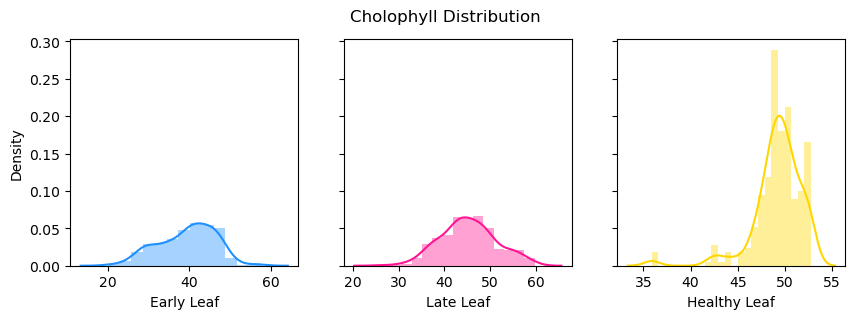

Cholophyll Value Statistics 

Early Leaf
Mean: 39.43
Variance: 47.41 

Late Leaf
Mean: 45.21
Variance: 37.06 

Healthy Leaf
Mean: 49.22
Variance: 6.91


In [25]:
early_ch_mean = np.mean(early_ch)
late_ch_mean = np.mean(late_ch)
healthy_ch_mean = np.mean(healthy_ch)
early_ch_var = np.var(early_ch)
late_ch_var = np.var(late_ch)
healthy_ch_var = np.var(healthy_ch)

fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
fig.suptitle('Cholophyll Distribution')
sns.distplot(early_ch , color="dodgerblue", ax=axes[0], axlabel='Early Leaf', )
sns.distplot(late_ch , color="deeppink", ax=axes[1], axlabel='Late Leaf')
sns.distplot(healthy_ch , color="gold", ax=axes[2], axlabel='Healthy Leaf')
plt.show()

print('Cholophyll Value Statistics \n')
print('Early Leaf')
print(f'Mean: {round(early_ch_mean,2)}')
print(f'Variance: {round(early_ch_var,2)} \n')
      
print('Late Leaf')
print(f'Mean: {round(late_ch_mean,2)}')
print(f'Variance: {round(late_ch_var,2)} \n')

print('Healthy Leaf')
print(f'Mean: {round(healthy_ch_mean,2)}')
print(f'Variance: {round(healthy_ch_var,2)}')      
